In [22]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.rcParams['text.usetex']=True

In [16]:
def f(u, a, b):
    return a*u/(1+b*u)
    
def model(V, t, prms):
    x,y,z = V
    dxdt = x*(1-x) - f(x, prms['a1'], prms['b1'])*y
    dydt = f(x, prms['a1'], prms['b1'])*y - f(y, prms['a2'], prms['b2'])*z - prms['d1']*y
    dzdt = f(y, prms['a2'], prms['b2'])*z - prms['d2']*z
    
    return [dxdt,dydt, dzdt]
    
parameters = {
    'a1':5,
    'b1':3,
    'a2':.1,
    'b2':2,
    'd1':.4,
    'd2':.01
}
V0 = [.8, .15, 9.9]
t = np.linspace(0, 6000,10000)

sol = odeint(model, V0, t, args=(parameters,))

Text(0.5, 0, 'Time')

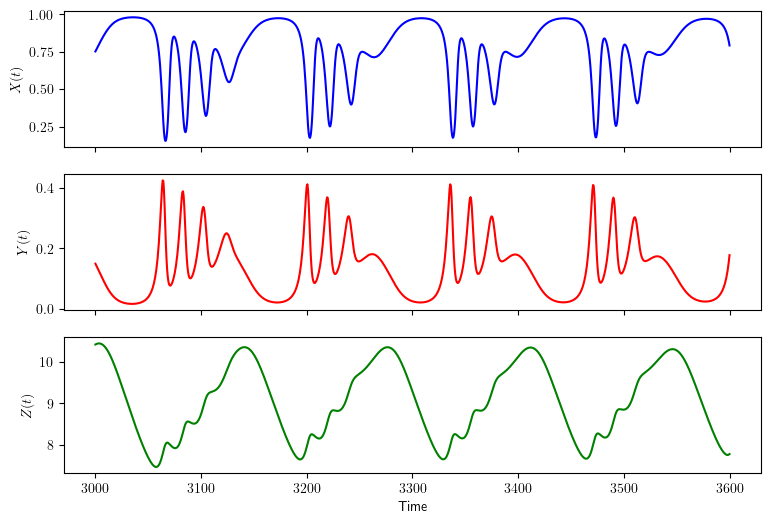

In [36]:

figts, axts = plt.subplots(3,sharex=True, figsize = (9,6))
axts[0].plot(t[5000:6000], sol[5000:6000, 0], color='blue')
axts[0].set_ylabel('$X(t)$')

axts[1].plot(t[5000:6000], sol[5000:6000, 1], color='red')
axts[1].set_ylabel('$Y(t)$')

axts[2].plot(t[5000:6000], sol[5000:6000, 2], color='green')
axts[2].set_ylabel('$Z(t)$')


axts[2].set_xlabel('Time')

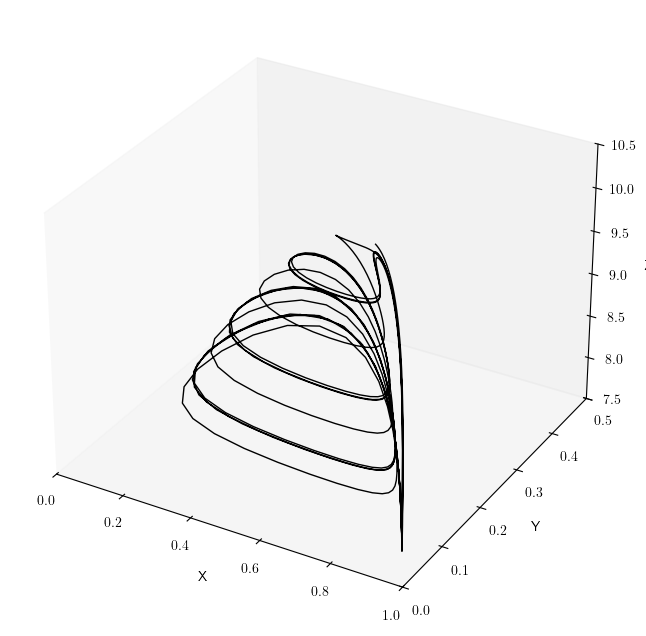

In [59]:

from mpl_toolkits.mplot3d import Axes3D
x, y, z = sol[5000:6000, 0], sol[5000:6000, 1], sol[5000:6000,2]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, color='black', linewidth=1)
ax.plot(0.8, 0.15, 9.9, color='red', markersize=5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.set_xlim(0,1)
ax.set_ylim(0,.5)
ax.set_zlim(7.5, 10.5)
ax.grid(False)